In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt


In [8]:
df = pd.read_csv('project.csv')
df = df.drop(['Unnamed: 0'],axis=1)

In [10]:
df.shape

(70118, 14)

In [9]:
df.columns

Index(['region', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [11]:
df.isnull().sum()

region       16
Name          0
Gender        0
Age           0
Height        0
Weight        0
Team          0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60074
dtype: int64

In [12]:
df

,region,Name,Gender,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,Afghanistan,Masoud Azizi,M,19.0,168.0,64.0,Afghanistan,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN
1,Afghanistan,Masoud Azizi,M,23.0,168.0,64.0,Afghanistan,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN
2,Afghanistan,Masoud Azizi,M,27.0,168.0,64.0,Afghanistan,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,NaN
3,Afghanistan,Nesar Ahmad Bahawi,M,24.0,186.0,68.0,Afghanistan,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Men's Featherweight,NaN
4,Afghanistan,Nesar Ahmad Bahawi,M,28.0,186.0,68.0,Afghanistan,2012 Summer,2012,Summer,London,Taekwondo,Taekwondo Men's Welterweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70113,Zimbabwe,Micheen Barbara Thornycroft,F,29.0,175.0,72.0,Zimbabwe,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
70114,Zimbabwe,Tarath Tabitha Tsatsa,F,35.0,158.0,44.0,Zimbabwe,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN
70115,Zimbabwe,Tatenda Tsumba,M,24.0,175.0,73.0,Zimbabwe,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 200 metres,NaN
70116,Zimbabwe,Kevin Robert Ullyett,M,32.0,178.0,75.0,Zimbabwe,2004 Summer,2004,Summer,Athina,Tennis,Tennis Men's Doubles,NaN


In [ ]:
groupgender=df.groupby('Gender')['Name'].count().reset_index(name='count')
groupgender

,Gender,count
0,F,30034
1,M,40084


As we can see in this visualization, more men participate in the Olympics than women.

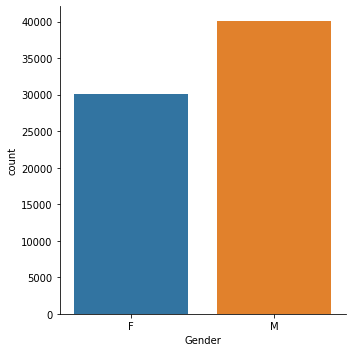

In [ ]:
sns.catplot(x="Gender",y="count",kind='bar',data=groupgender)

In [17]:
label = ['18 to 25','25 to 32','32 to 40','40 to 48','48 to 56','old']
ranges = [18,25,32,40,48,56,np.inf]
df['age_ranges']=pd.cut(df['Age'],bins=ranges,labels=label)
# df.groupby(['borough','price_range'])['price_range'].count()
df['age_ranges'].value_counts()

18 to 25    32420
25 to 32    26493
32 to 40     6287
40 to 48      887
48 to 56      202
old            34
Name: age_ranges, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


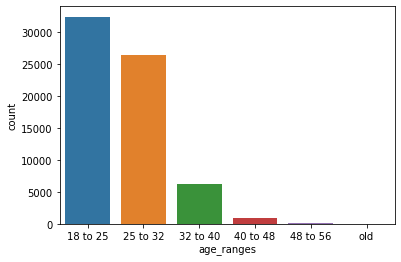

In [18]:
plt.figure()
sns.countplot(df['age_ranges'], order=['18 to 25', '25 to 32', '32 to 40', '40 to 48','48 to 56','old'])
plt.show()

In [ ]:
regiongroup=df.groupby('region')['Name'].count().reset_index(name='count')
regiongroup=regiongroup.sort_values(['count'],ascending=False).head(10)
regiongroup

,region,count
191,USA,4229
151,Russia,3275
67,Germany,3230
39,China,2910
33,Canada,2776
87,Italy,2611
63,France,2562
10,Australia,2394
90,Japan,2380
190,UK,2204


According to the 2nd visualization, we count how many people participated from each region and sort it by the number of participants.

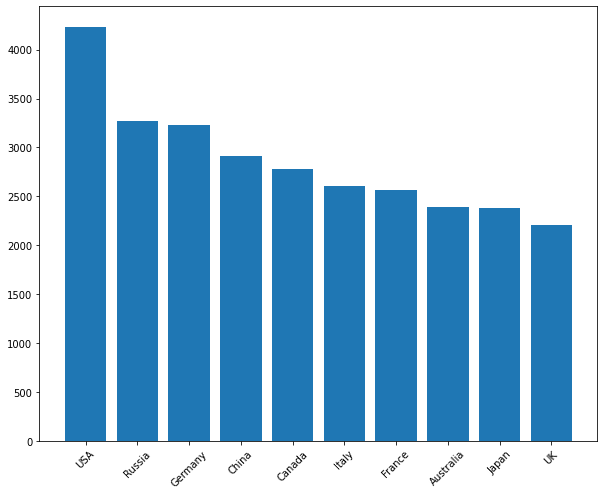

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(regiongroup.region, regiongroup['count'])
ax.set_xticklabels(regiongroup.region, rotation = 45)
plt.show()

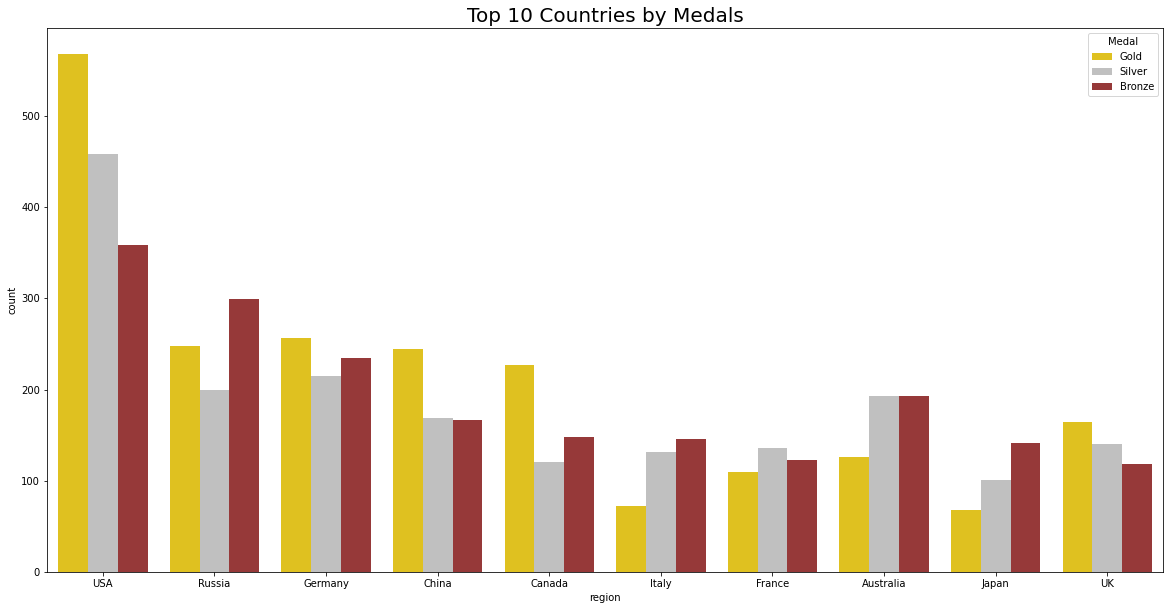

In [ ]:
top10 = df.region.value_counts().head(10)
olympics = df[df.region.isin(top10.index)]
plt.figure(figsize=(20, 10))
sns.countplot(data = olympics, x = "region", hue = "Medal", order = top10.index, 
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

As you can see in the next visualization, we will see how many gold, silver, and bronze you have won in the previously sorted regions.

Text(0.5, 1.0, 'Sum of Male Athletes in Summer each olimpiads')

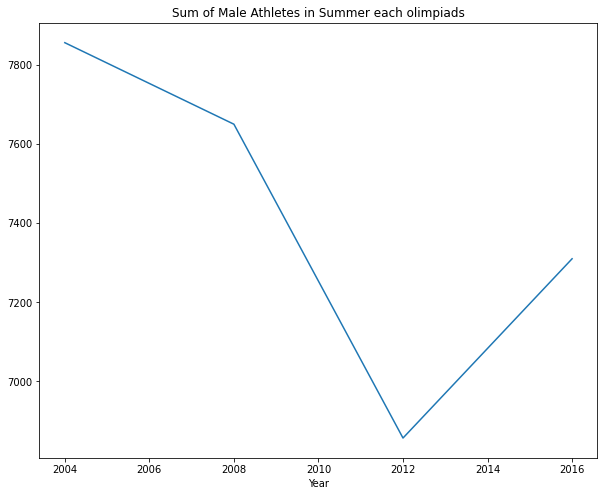

In [ ]:
Summer = df[(df.Gender == 'M') & (df.Season == 'Summer')]
part = Summer.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(10, 8))
part.loc[:,'M'].plot()
plt.title('Sum of Male Athletes in Summer each olimpiads')

in the next visualization we will see whether the number of men participating in the summer olympiad has decreased or increased

in the next one, it's the same as the previous one, but we can see that there were many participants in the Winter Olympiad. Since 2010, that figure has increased.

Year  Gender
2002  M         2505
2006  M         2612
2010  M         2541
2014  M         2753
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Sum of Male Athletes in season Winter each olimpiad')

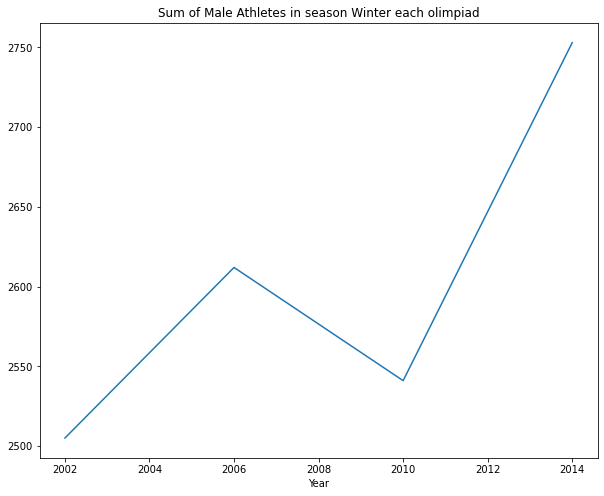

In [ ]:
Winter = df[(df.Gender == 'M') & (df.Season == 'Winter')]
part = Winter.groupby('Year')['Gender'].value_counts()
print(part)
plt.figure(figsize=(10, 8))
part.loc[:,'M'].plot()
plt.title('Sum of Male Athletes in season Winter each olimpiad')

and here in the winter season, we will see how many women participate instead of men.

Year  Gender
2002  F         1555
2006  F         1753
2010  F         1837
2014  F         1920
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Sum of female Athletes in season Winter each olimpiad')

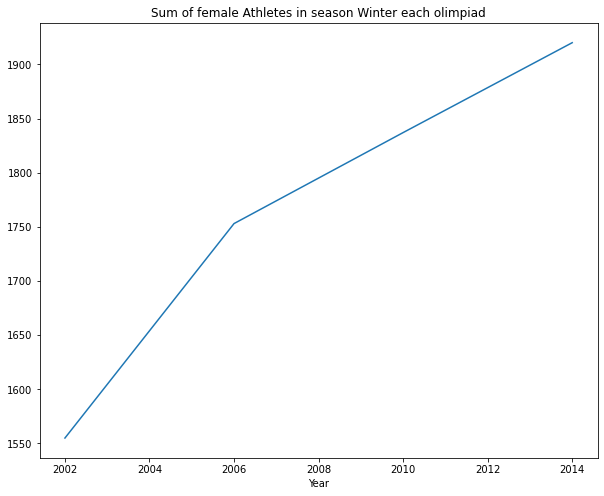

In [ ]:
Winter = df[(df.Gender == 'F') & (df.Season == 'Winter')]
part = Winter.groupby('Year')['Gender'].value_counts()
print(part)
plt.figure(figsize=(10, 8))
part.loc[:,'F'].plot()
plt.title('Sum of female Athletes in season Winter each olimpiad')

if we look at the previous visualizations, we can see that the largest number of people participated in the summer season. And we can see that the number of people participating in the winter Olympics is increasing.

Year  Gender
2004  F         5521
2008  F         5716
2012  F         5631
2016  F         6101
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Sum of female Athletes in season Summer each olimpiad')

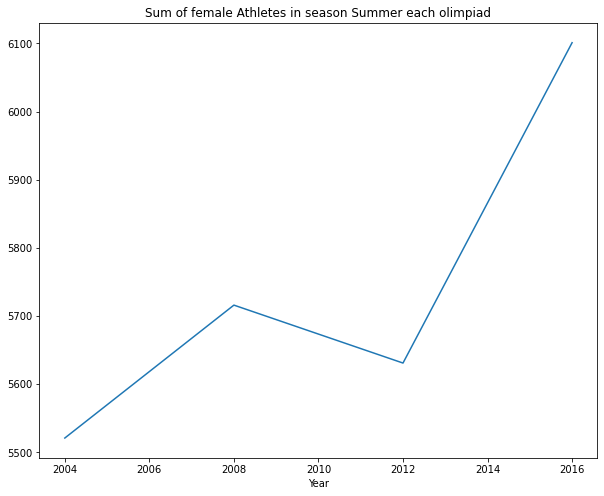

In [ ]:
Winter = df[(df.Gender == 'F') & (df.Season == 'Summer')]
part = Winter.groupby('Year')['Gender'].value_counts()
print(part)
plt.figure(figsize=(10, 8))
part.loc[:,'F'].plot()
plt.title('Sum of female Athletes in season Summer each olimpiad')

And the from this visualization we can see that men have won more medals than women

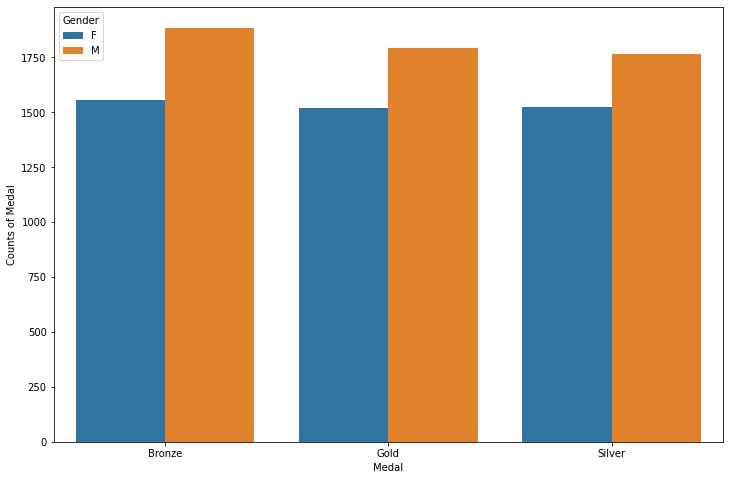

In [ ]:
winners = pd.crosstab(df["Gender"],df["Medal"])
plt.rcParams['figure.figsize'] = (12, 8)
winners
stacked = winners.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Medal, y=stacked.value, hue=stacked.Gender)
plt.ylabel("Counts of Medal")
plt.show()

In [ ]:
topregions=df.groupby(['region','Season'])['Medal'].count().reset_index()
bySeason = topregions[topregions['Season']=='Summer']
top15 = bySeason.sort_values(['Medal'],ascending=False).head(15)
top15regions=df[df['region'].isin(top15['region'])].groupby(['region','Year','Season'])['Medal'].count().reset_index(name='count')
dataframe = top15regions[top15regions['Season']=='Summer']
dataframe=dataframe.sort_values(['count'],ascending=False)
dataframe

,region,Year,Season,count
115,USA,2008,Summer,316
119,USA,2016,Summer,263
113,USA,2004,Summer,262
117,USA,2012,Summer,248
81,Russia,2004,Summer,189
35,China,2008,Summer,184
55,Germany,2016,Summer,159
9,Australia,2004,Summer,157
11,Australia,2008,Summer,149
49,Germany,2004,Summer,149


with the help of this visualization, we can see the top 15 regions with the highest number of medals, and we can see whether their number of medals has increased or not.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


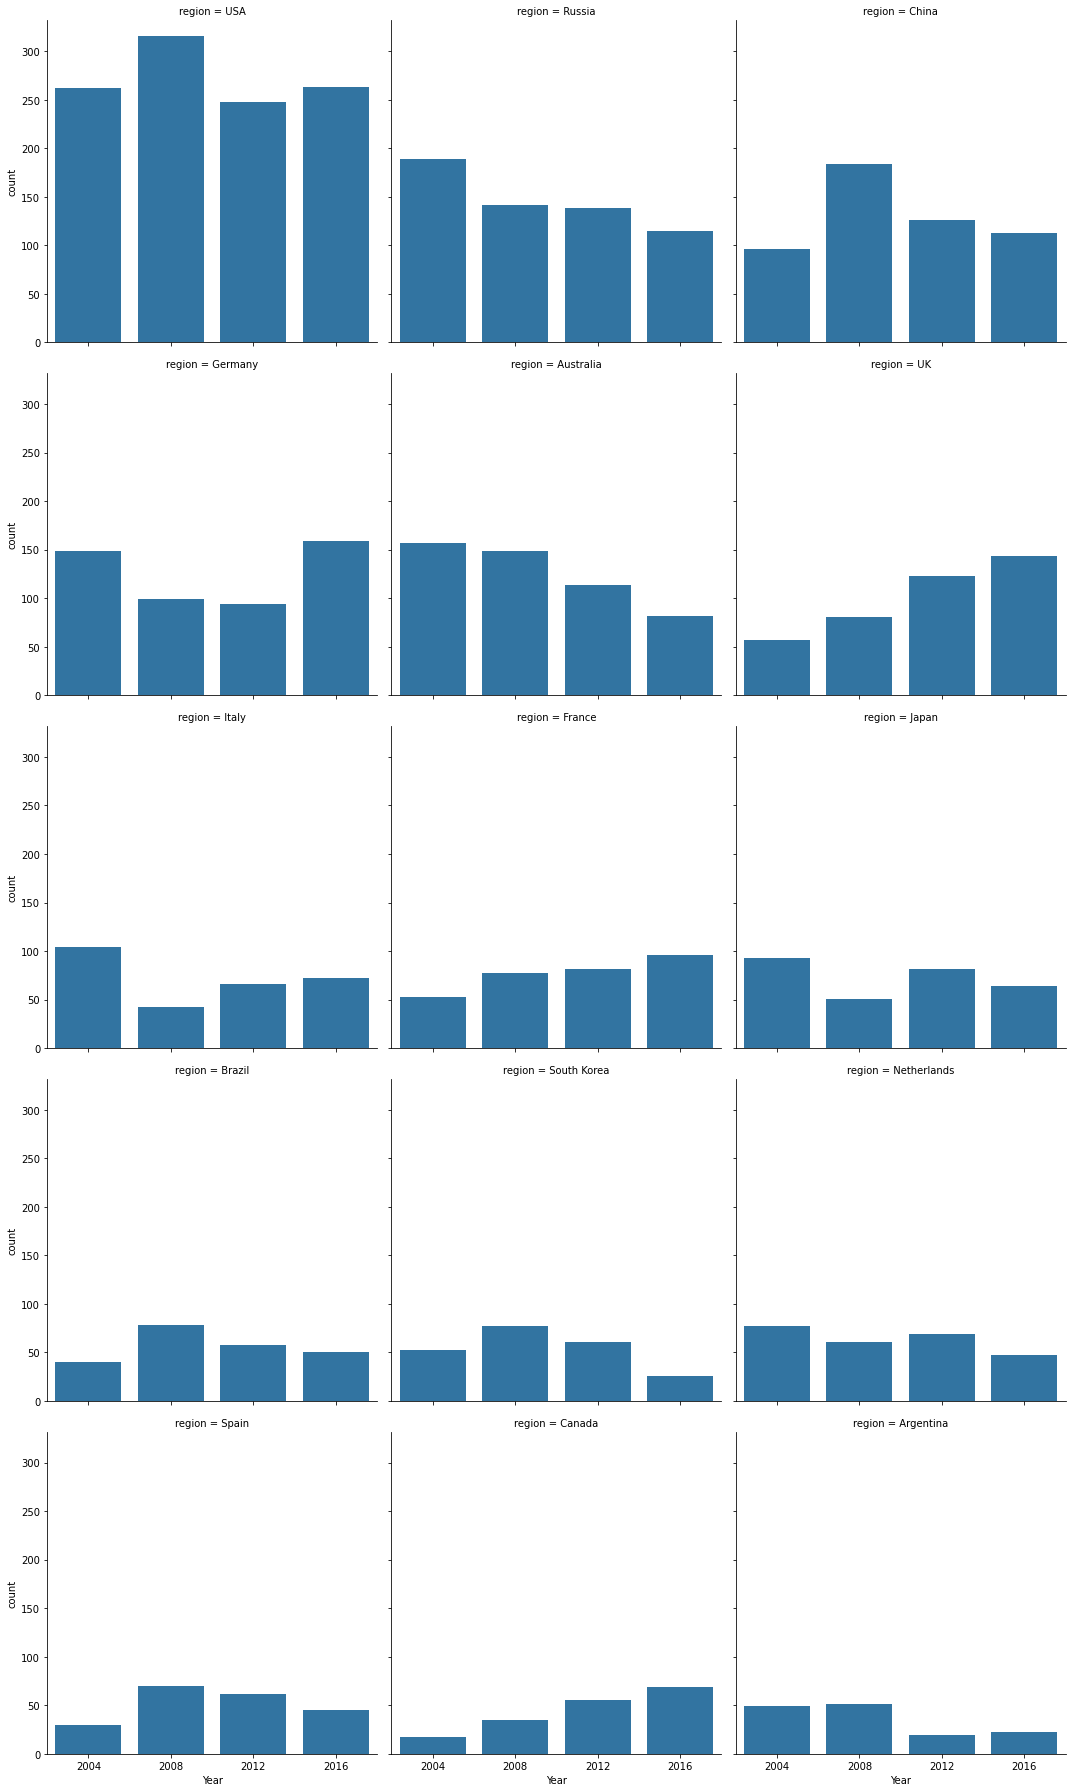

In [ ]:
g = sns.FacetGrid(dataframe, col="region",col_wrap=3, size=5)
g.map(sns.barplot,'Year','count')

In [ ]:
Sport=df.groupby('Sport')['Sport'].count().reset_index(name='count')
Sport=Sport.sort_values(by=['count'],ascending=False).head(10)
Sport


,Sport,count
2,Athletics,8996
40,Swimming,6349
21,Gymnastics,3735
11,Cross Country Skiing,3039
7,Biathlon,2619
13,Cycling,2552
0,Alpine Skiing,2498
33,Shooting,2216
30,Rowing,2211
18,Football,1797


In the following visualization, we can see which sport has the most participation.

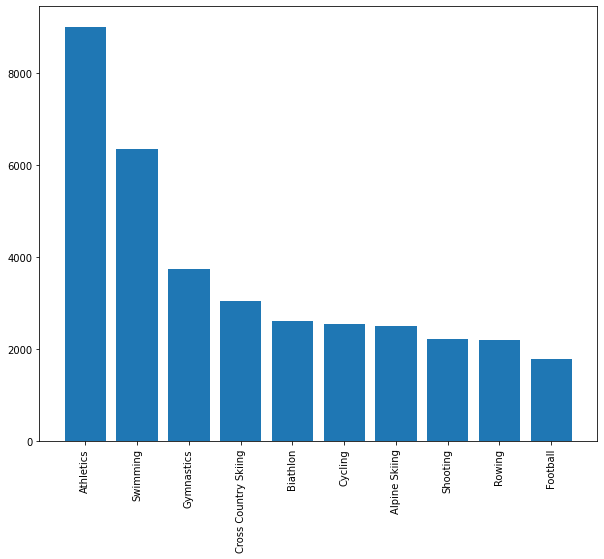

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(Sport.Sport, Sport['count'])
ax.set_xticklabels(Sport.Sport, rotation = 90)
plt.show()

In [ ]:
SEY=df.groupby(['Sport','Year'])['Sport'].count().reset_index(name='count')
SEY = SEY.sort_values(['count'],ascending=False)
SEY

,Sport,Year,count
11,Athletics,2016,2396
10,Athletics,2012,2236
9,Athletics,2008,2193
8,Athletics,2004,2171
151,Swimming,2008,1712
...,...,...,...
132,Skeleton,2002,38
173,Trampolining,2016,32
170,Trampolining,2004,32
171,Trampolining,2008,32


In the last visualization, we can see which sport has the most participation in each Olympiad


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


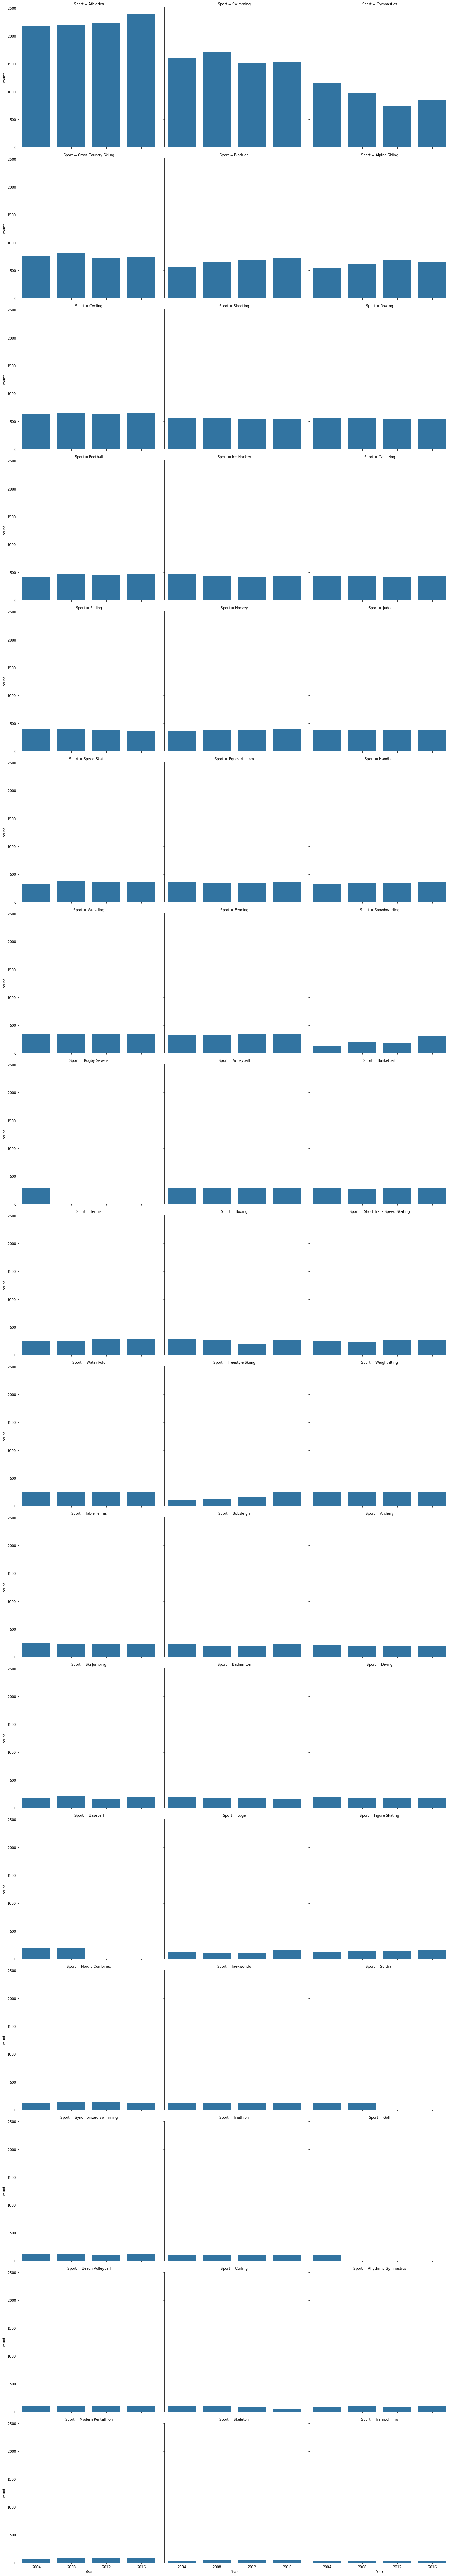

In [ ]:
g = sns.FacetGrid(SEY, col="Sport",col_wrap=3, size=6)
g.map(sns.barplot,'Year','count')

In [ ]:
avg_weight=df.groupby('Sport')['Weight'].mean().reset_index(name='average_weight')
sorted = avg_weight.sort_values(['average_weight'],ascending=False)
sorted

,Sport,average_weight
8,Bobsleigh,92.644876
4,Baseball,88.132546
5,Basketball,87.330373
48,Water Polo,85.190058
22,Handball,82.335799
24,Ice Hockey,81.261421
30,Rowing,80.551334
47,Volleyball,80.328634
6,Beach Volleyball,79.370757
49,Weightlifting,79.219819


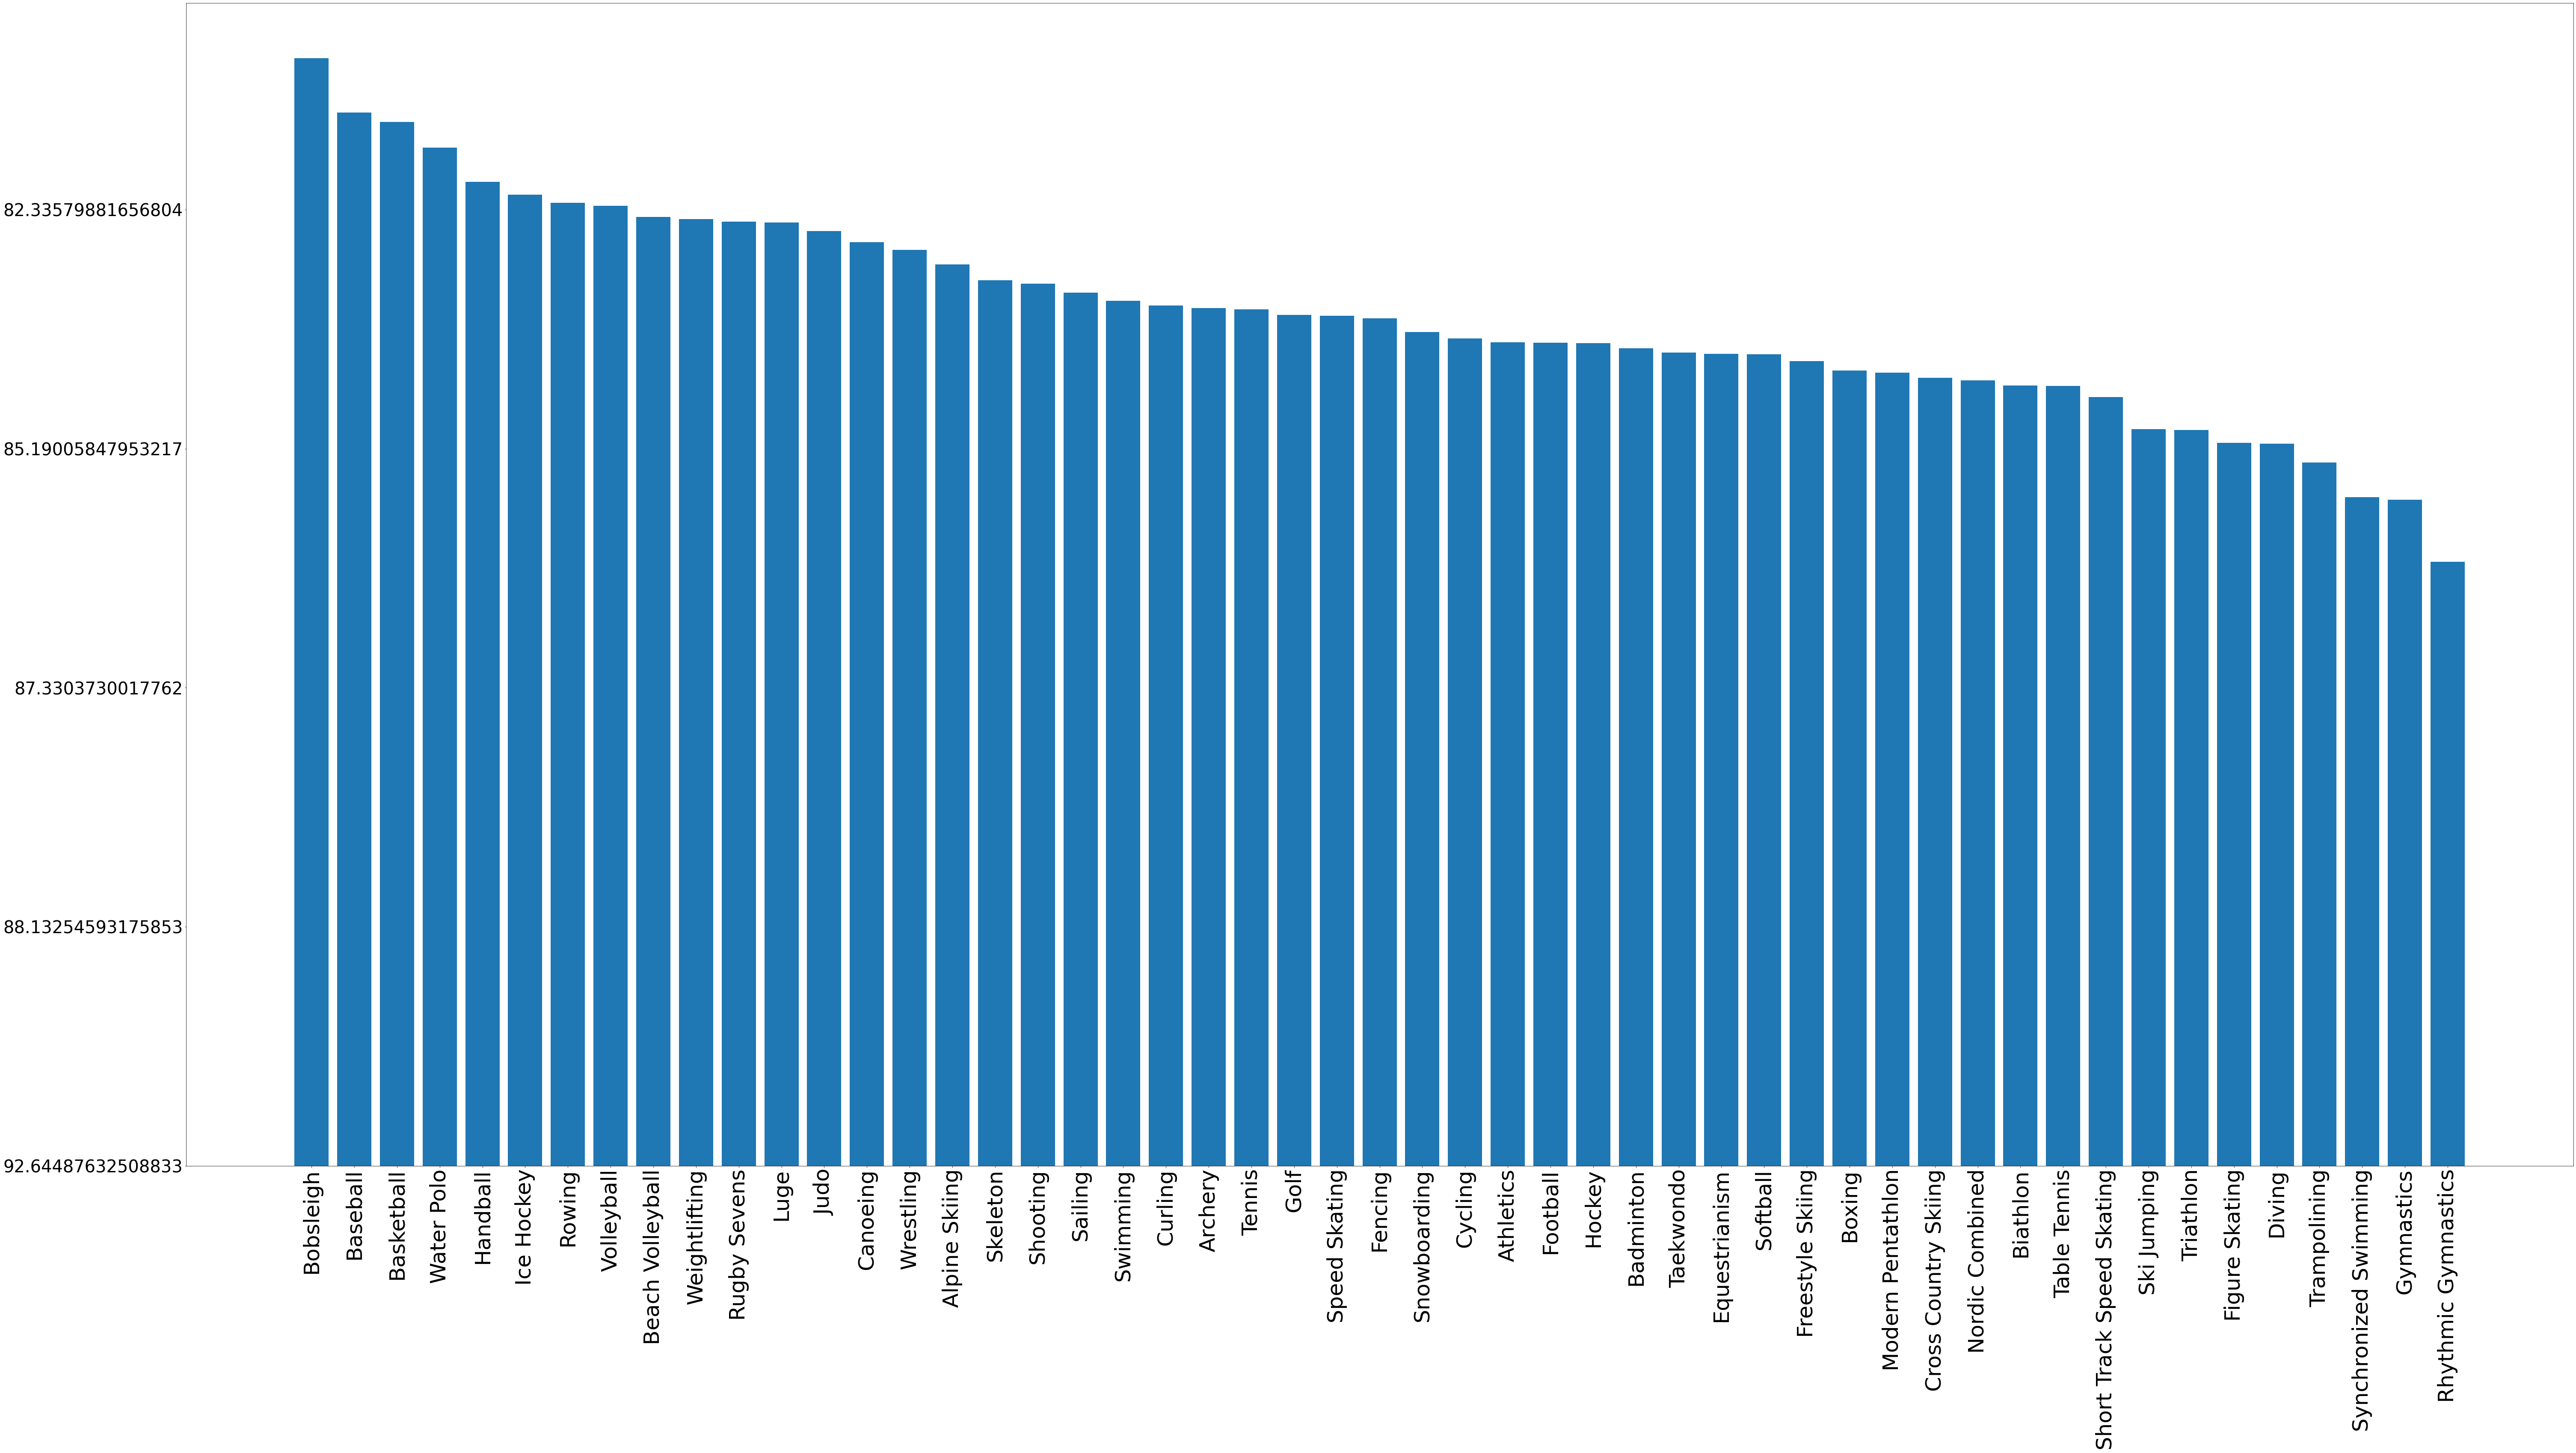

In [ ]:
fig, ax = plt.subplots(figsize = (100, 50))
ax.bar(sorted.Sport, sorted['average_weight'])
ax.set_xticklabels(sorted.Sport, rotation = 90,size=50)
ax.set_yticklabels(sorted['average_weight'],size=40)
plt.show()